<a href="https://colab.research.google.com/github/niku2712/Bank-term-deposit/blob/main/bank_marketing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("/content/drive/MyDrive/bank marketing dataset.csv")
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
print('='*50)
print("Columns in data")
print('='*50)
print(dataset.columns.values)

Columns in data
['age' 'job' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'contact' 'day' 'month' 'duration' 'campaign' 'pdays' 'previous'
 'poutcome' 'y']


In [9]:
print('='*20)
print("Data shape")
print('='*20)
print(dataset.shape)

Data shape
(4521, 17)


In [10]:
dataset.describe

<bound method NDFrame.describe of       age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  du

In [11]:
print('='*50)
print("\nData Information\n")
print('='*50)
print(dataset.info())


Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [12]:
#checking if the dataset has any null value
dataset.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
# Select a numeric and category column name of dataset
numeric_col = dataset.select_dtypes(include=['int64', 'float64']).columns
category_col = dataset.select_dtypes(include=['object']).columns

In [14]:
# Print unique values for each column
for col in category_col:
    print(col, "(", len(dataset[col].unique()) , "values):\n", np.sort(dataset[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 3 values):
 ['divorced' 'married' 'single']
education ( 4 values):
 ['primary' 'secondary' 'tertiary' 'unknown']
default ( 2 values):
 ['no' 'yes']
housing ( 2 values):
 ['no' 'yes']
loan ( 2 values):
 ['no' 'yes']
contact ( 3 values):
 ['cellular' 'telephone' 'unknown']
month ( 12 values):
 ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
poutcome ( 4 values):
 ['failure' 'other' 'success' 'unknown']
y ( 2 values):
 ['no' 'yes']


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

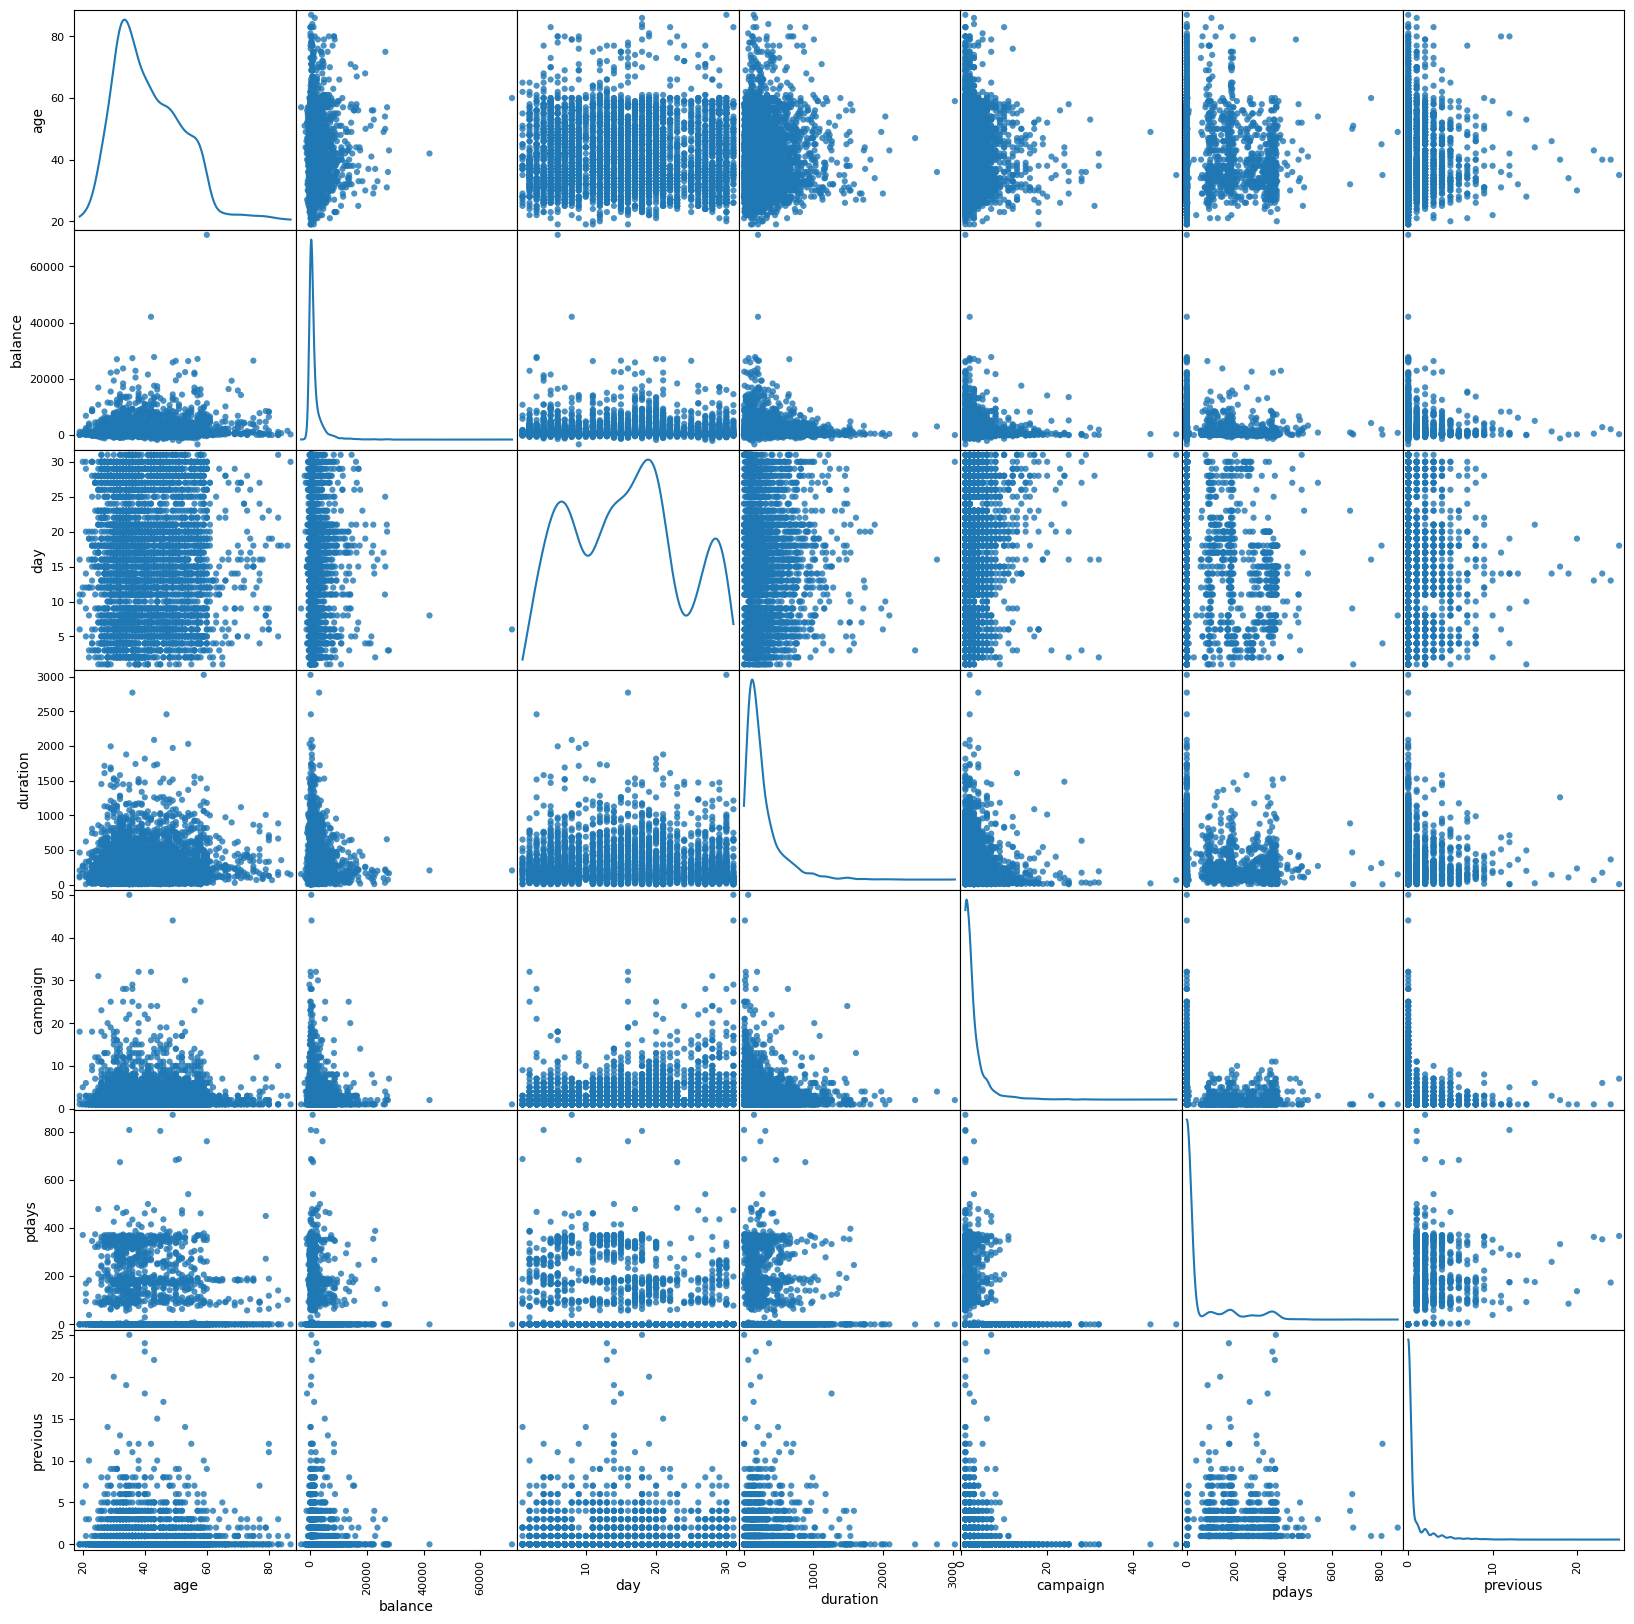

In [16]:
# Visualize distribution of dataset information
grr = pd.plotting.scatter_matrix(dataset, figsize=(20, 20), marker='o', hist_kwds={'bins': 20}, s=20, alpha=.8, diagonal='kde')
plt.show()

<ipython-input-17-09a03e591c0a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(dataset.corr(),annot = True)


Text(0.5, 1.0, 'Correlation Heatmap')

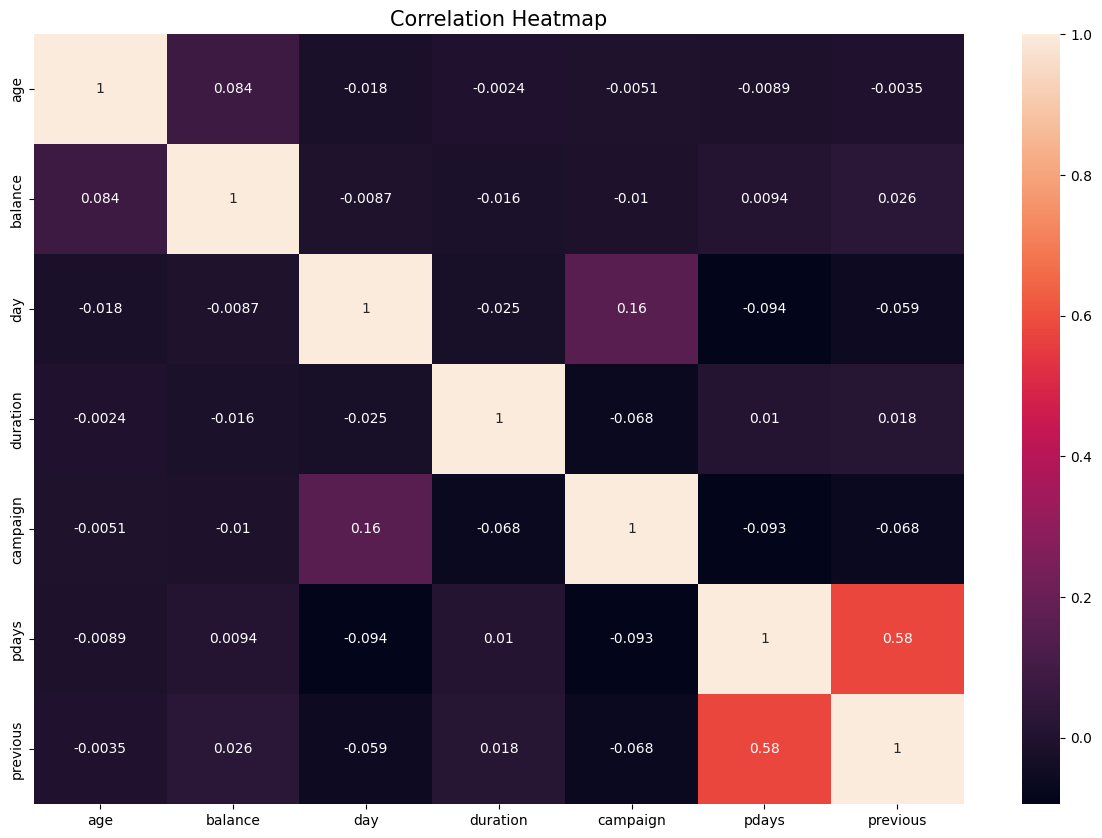

In [17]:
# corelation Heatmap for show the correlation for each features
fig = plt.figure(figsize=(15, 10))

heatmap = sns.heatmap(dataset.corr(),annot = True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15})

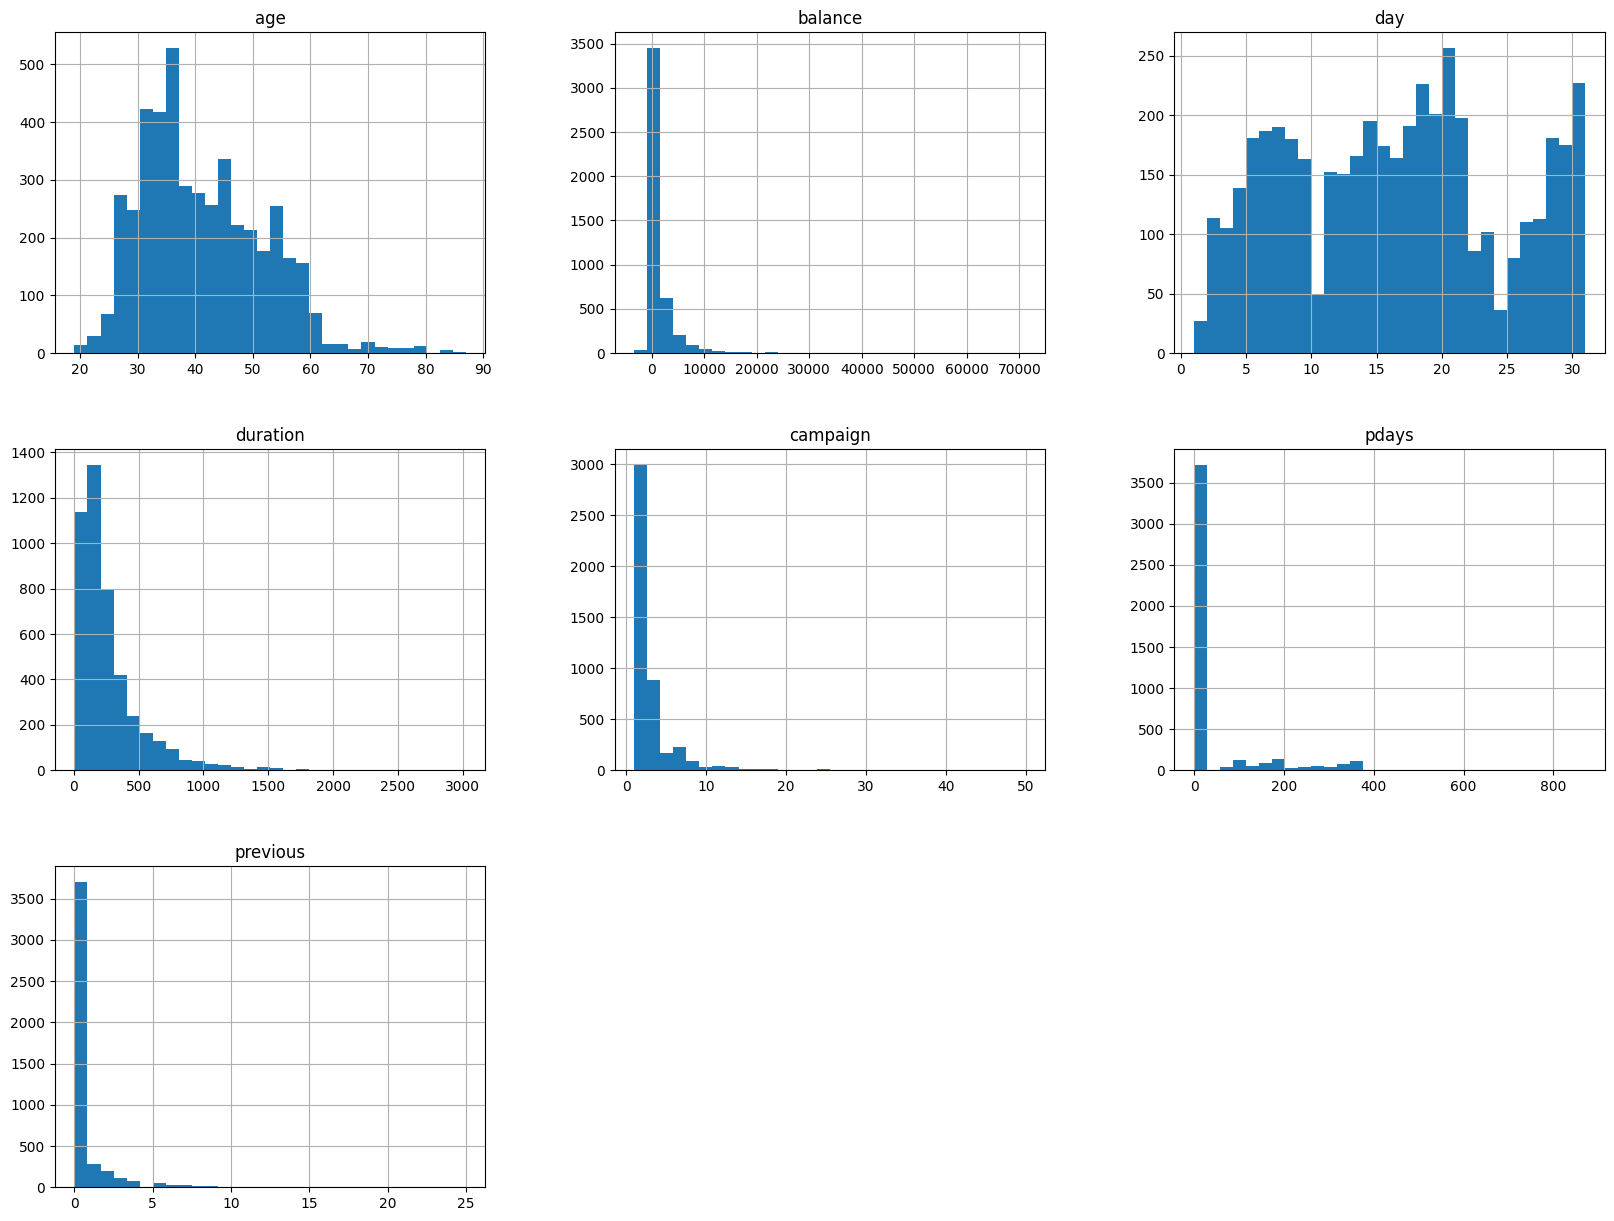

In [18]:
# As there are many category feature, so the heatmap will not help in this case
# Visualize distributions of numerical features with histograms

%matplotlib inline

dataset[numeric_col].hist(bins=30, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

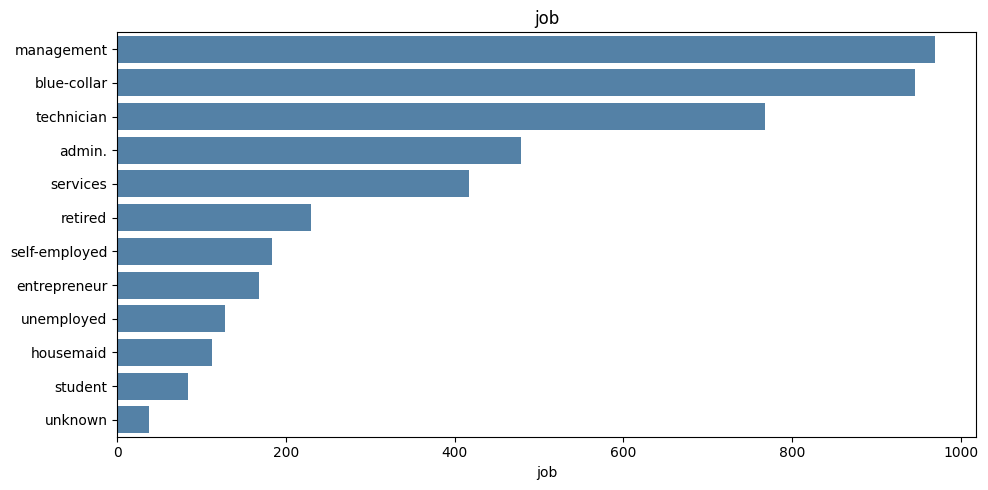

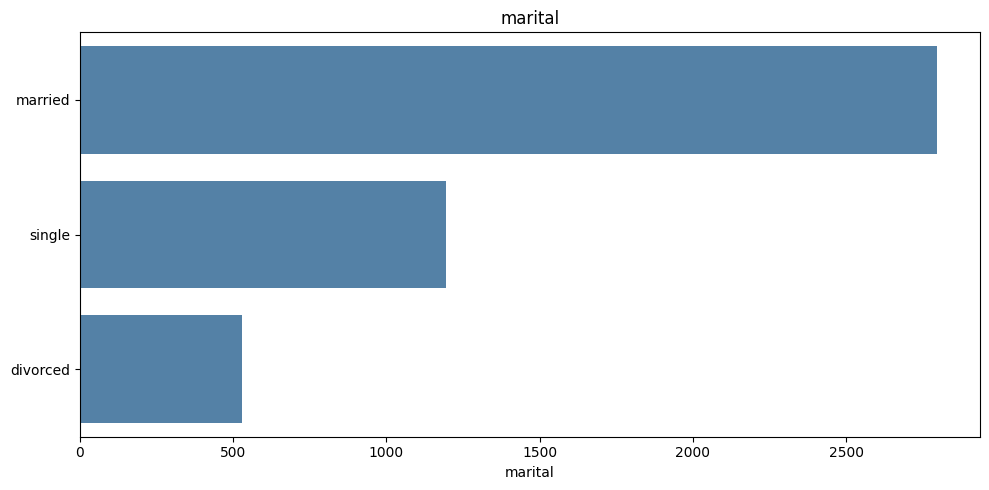

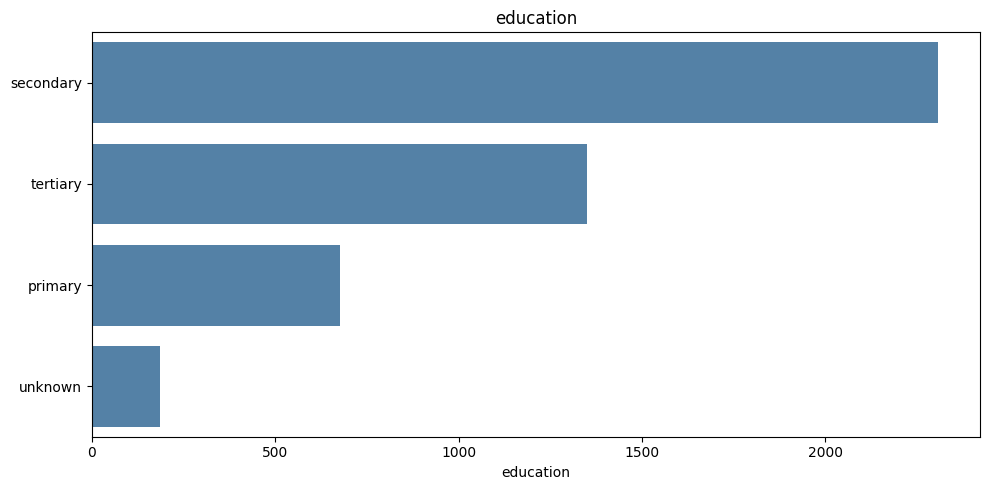

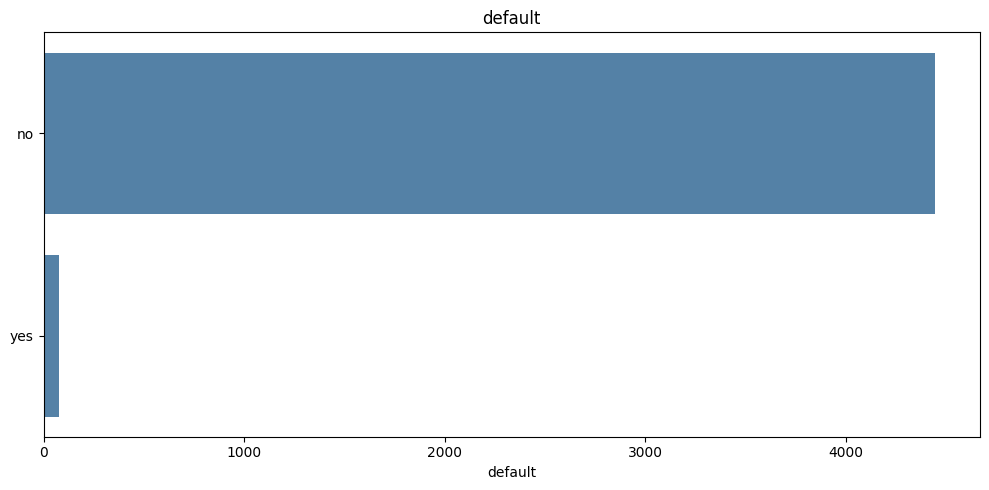

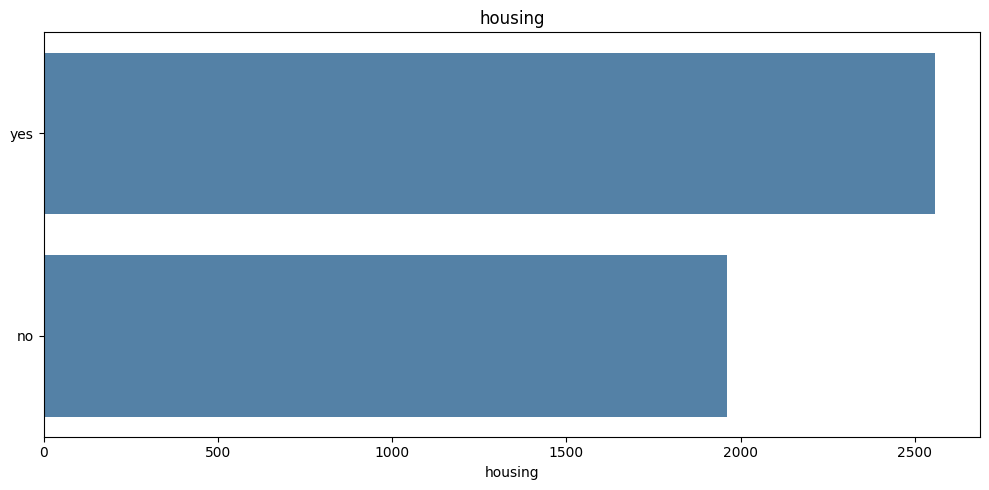

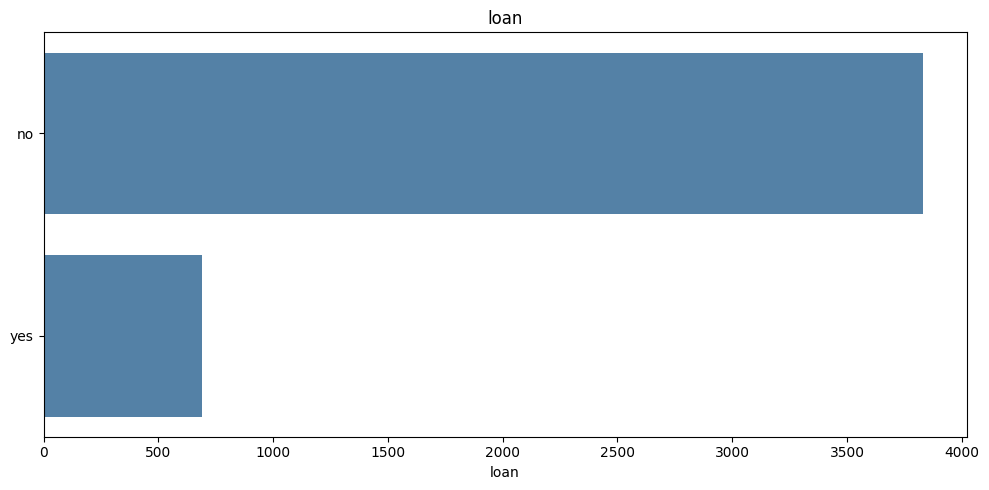

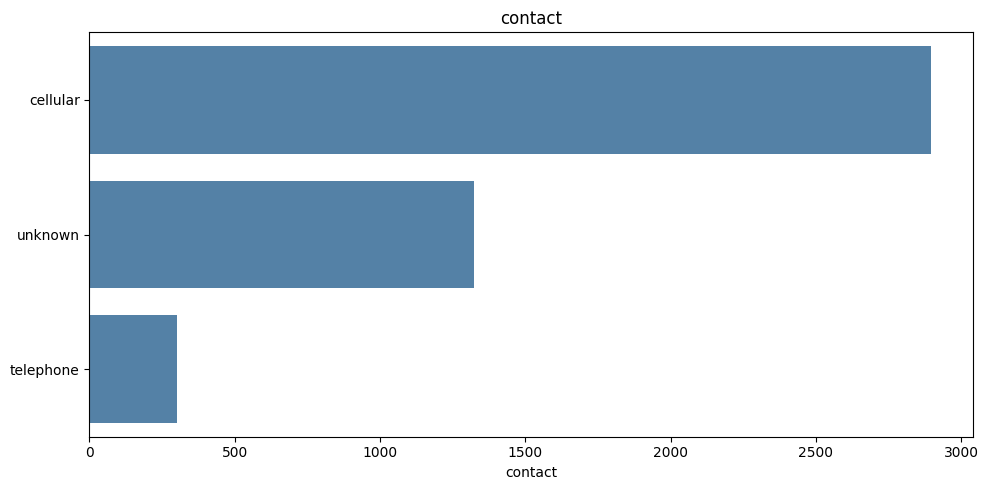

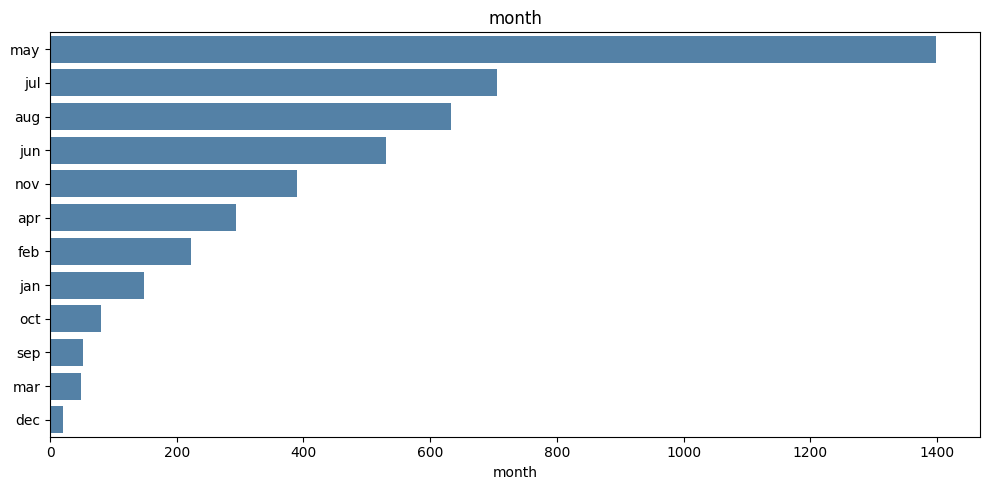

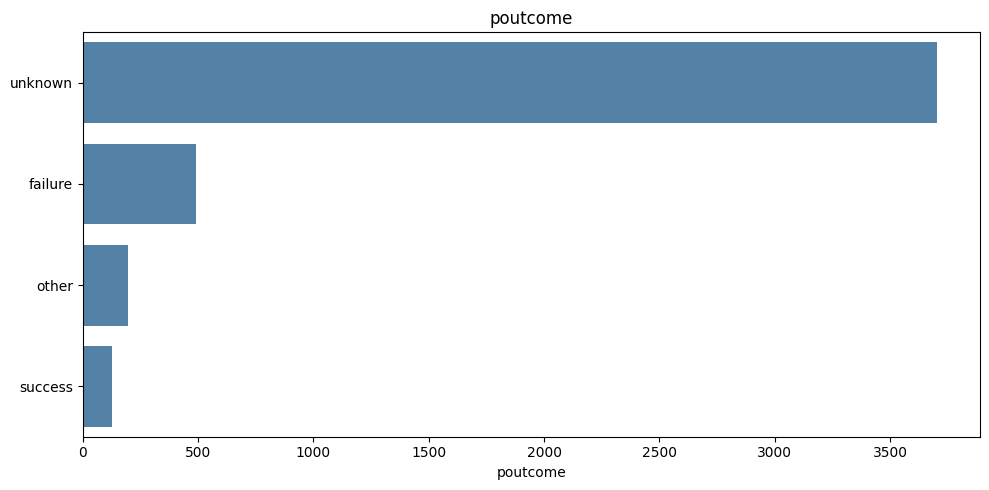

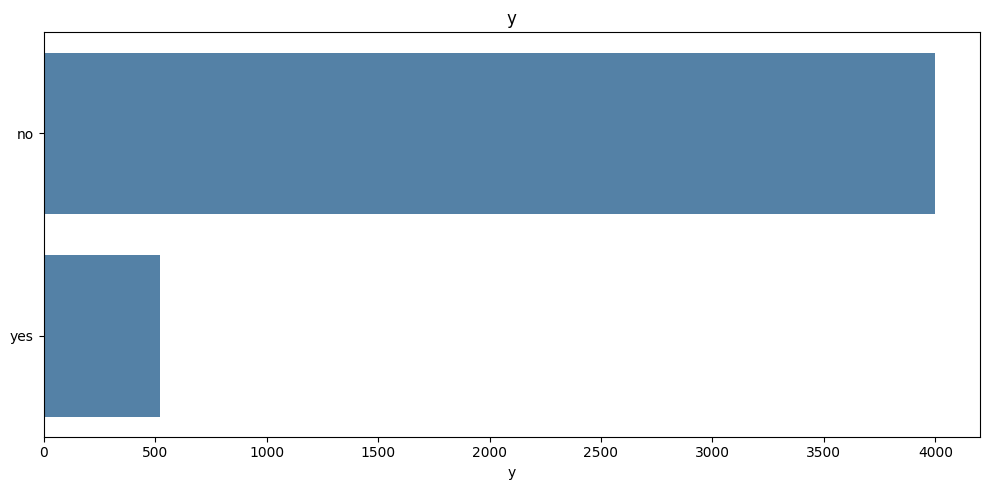

In [19]:
# Visualize a count values of category feature
for col in category_col:
    plt.figure(figsize=(10,5))
    sns.barplot(x=dataset[col].value_counts(), y=dataset[col].value_counts().index, data=dataset, color='steelblue')
    plt.title(col)
    plt.tight_layout()

however we can see that the management jobs and the blue collar jobs has the highest percentage of buying that term deposit.
also the married persons has the highes percentage of buying it
we can also see that in may month it has the highest buying
the clients who has no loan are also buying the term deposit

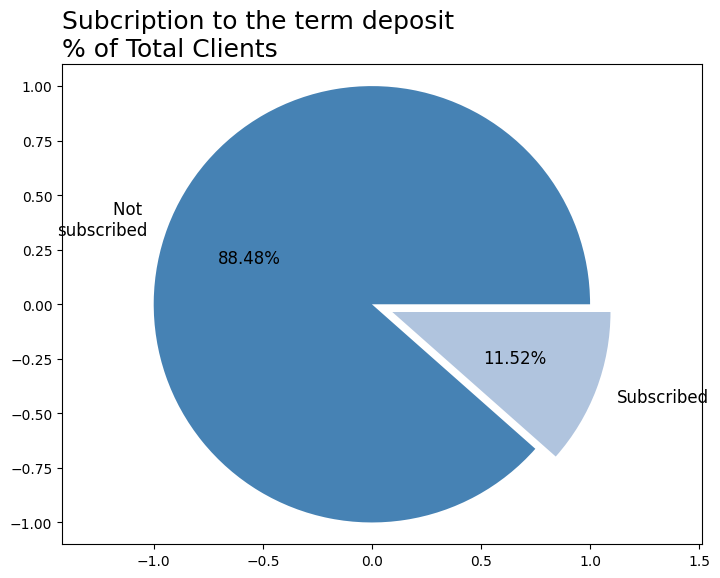

In [20]:
# Pie chart showing the percentage of subcription to the term deposit
labels = ["Not \nsubscribed", "Subscribed"]
explode = (0, 0.1)  # only "explode" the second slice (i.e. 'Subscribed')

# depicting the visualization
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.pie(dataset['y'].value_counts(),
       labels = labels,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=12),
       colors = ['steelblue', 'lightsteelblue'])

ax.axis('equal')
plt.title('Subcription to the term deposit\n% of Total Clients',
     loc='left',
     color = 'black',
     fontsize = '18')

plt.show()

**Visualizing the subcription rate by age**

In [21]:
# Setup temp of dataframe
temp_df = dataset
temp_df.loc[temp_df["age"] < 30,  'age_group'] = 20
temp_df.loc[(temp_df["age"] >= 30) & (temp_df["age"] <= 39), 'age_group'] = 30
temp_df.loc[(temp_df["age"] >= 40) & (temp_df["age"] <= 49), 'age_group'] = 40
temp_df.loc[(temp_df["age"] >= 50) & (temp_df["age"] <= 59), 'age_group'] = 50
temp_df.loc[temp_df["age"] >= 60, 'age_group'] = 60

In [22]:
age_rate_sub = temp_df[temp_df['y'] == 'yes'][['age_group', 'y']].groupby('age_group').count()
age_rate_nonsub = temp_df[temp_df['y'] == 'no'][['age_group', 'y']].groupby('age_group').count()

age_rate_sub.y = age_rate_sub.y/age_rate_sub.y.sum() * 100
age_rate_nonsub.y = age_rate_nonsub.y/age_rate_nonsub.y.sum() * 100

print(age_rate_sub)
print(age_rate_nonsub)

                   y
age_group           
20.0       14.203455
30.0       35.508637
40.0       23.608445
50.0       16.122841
60.0       10.556622
                y
age_group        
20.0       10.200
30.0       40.575
40.0       27.000
50.0       19.250
60.0        2.975


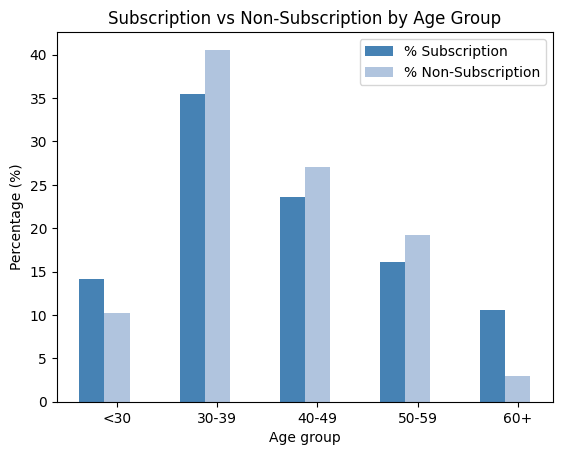

In [23]:
# set width of bar
barWidth = 0.25

# Set position of bar on X axis
br1 = np.arange(5)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, age_rate_sub.y, color ='steelblue', width = barWidth,
        label ='% Subscription')
plt.bar(br2, age_rate_nonsub.y, color ='lightsteelblue', width = barWidth,
        label ='% Non-Subscription')

# Adding title
plt.title('Subscription vs Non-Subscription by Age Group')
plt.xlabel('Age group')
plt.ylabel('Percentage (%)')
plt.xticks([r + barWidth for r in range(5)],
        ['<30', '30-39', '40-49', '50-59', '60+'])

plt.legend()
plt.show()

In [24]:
count_age_response = pd.crosstab(temp_df['y'], temp_df['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response = count_age_response.transpose()

age = pd.DataFrame(temp_df['age_group'].value_counts())
age = age.sort_index()
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response['yes']
age.drop('age_group',axis = 1 ,inplace = True)
age

,% Contacted,% Subscription
20.0,10.661358,15.352697
30.0,39.991152,10.232301
40.0,26.609157,10.224439
50.0,18.889626,9.836066
60.0,3.848706,31.609195


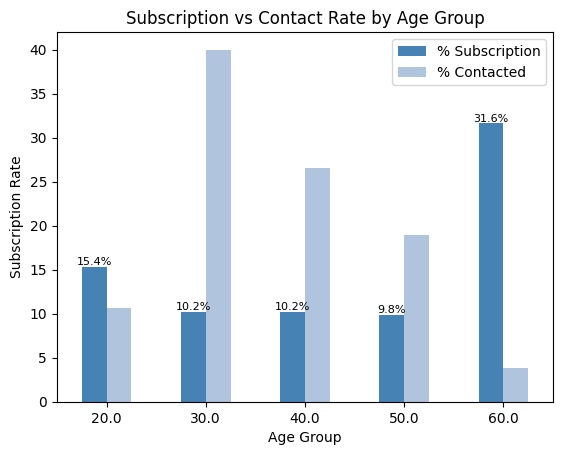

In [25]:
# Setup plot
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('steelblue','lightsteelblue'))

# Adding title
plt.title('Subscription vs Contact Rate by Age Group')
plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_age.patches,
                      age['% Subscription'].round(1).astype(str)):
    plot_age.text(rec.get_x() + rec.get_width()/2,
                      rec.get_height() + 0.25,
                      label+'%',
                      ha = 'center',
                      color = 'black',
                      size = 8)

plt.legend()
plt.show()

**Visualizing the subcription rate by job**

In [26]:
count_job_response = pd.crosstab(temp_df['y'], temp_df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response = count_job_response.transpose()

count_job_response

y,no,yes
job,,
admin.,87.866109,12.133891
blue-collar,92.706131,7.293869
entrepreneur,91.071429,8.928571
housemaid,87.500000,12.500000
management,86.480908,13.519092
retired,76.521739,23.478261
self-employed,89.071038,10.928962
services,90.887290,9.112710
student,77.380952,22.619048


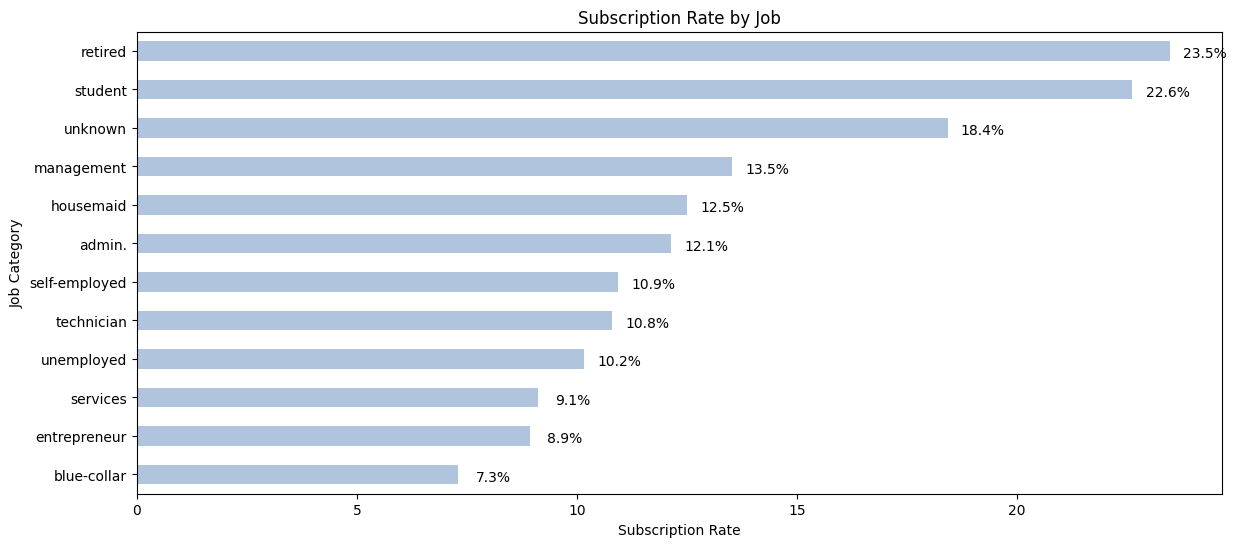

In [27]:
plot_job = count_job_response['yes'].sort_values(ascending = True).plot(kind ='barh',color = 'lightsteelblue', figsize = (14,6))

plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8,
                  rec.get_y()+ rec.get_height()-0.5,
                  label+'%',
                  ha = 'center',
                  va='bottom')

In [28]:
# Analyze the campaign contact period for client.
month_sort = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

count_month_response = pd.crosstab(temp_df['y'], temp_df['month']).apply(lambda x: x/x.sum() * 100)
count_month_response = count_month_response.transpose()
count_month_response = count_month_response.reindex(month_sort)

month = pd.DataFrame(temp_df['month'].value_counts())
month['% Contacted'] = month['month']*100/month['month'].sum()
month['% Subscription'] = count_month_response['yes']
month.drop('month',axis = 1,inplace = True)
month = month.reindex(month_sort)

month

,% Contacted,% Subscription
jan,3.273612,10.810811
feb,4.910418,17.117117
mar,1.083831,42.857143
apr,6.480867,19.112628
may,30.922362,6.652361
jun,11.745189,10.357815
jul,15.616014,8.640227
aug,14.001327,12.480253
sep,1.150188,32.692308
oct,1.769520,46.250000


([<matplotlib.axis.XTick at 0x7fe39ed09270>,
 [Text(0, 0, 'jan'),
  Text(1, 0, 'feb'),
  Text(2, 0, 'mar'),
  Text(3, 0, 'apr'),
  Text(4, 0, 'may'),
  Text(5, 0, 'jun'),
  Text(6, 0, 'jul'),
  Text(7, 0, 'aug'),
  Text(8, 0, 'sep'),
  Text(9, 0, 'oct'),
  Text(10, 0, 'nov'),
  Text(11, 0, 'dec')])

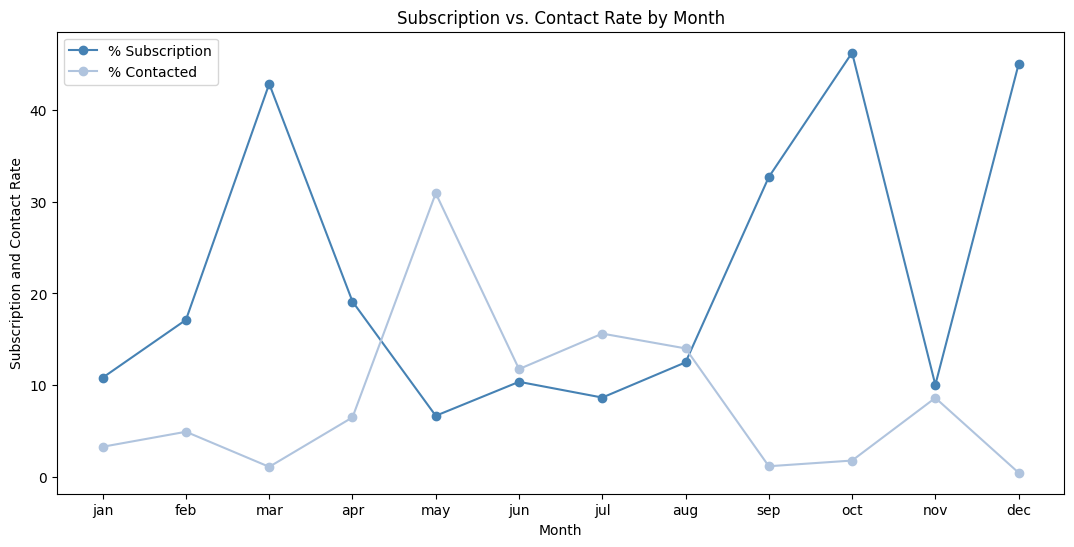

In [29]:
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          color = ('steelblue','lightsteelblue'),
                                                          figsize = (13,6),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(0,12,1)
plt.xticks(ticks, month_sort)

**Label encoding**

In [30]:
# changing the category values to numerical using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['job']=le.fit_transform(dataset['job'])
dataset['marital']=le.fit_transform(dataset['marital'])
dataset['education']=le.fit_transform(dataset['education'])
dataset['housing']=le.fit_transform(dataset['housing'])
dataset['loan']=le.fit_transform(dataset['loan'])
dataset['contact']=le.fit_transform(dataset['contact'])
dataset['month']=le.fit_transform(dataset['month'])
dataset['poutcome']=le.fit_transform(dataset['poutcome'])
dataset['y']=le.fit_transform(dataset['y'])
dataset['default']=le.fit_transform(dataset['default'])

In [83]:
dataset.describe

<bound method NDFrame.describe of       age  job  marital  education  default  balance  housing  loan  contact  \
0      30   10        1          0        0     1787        0     0        0   
1      33    7        1          1        0     4789        1     1        0   
2      35    4        2          2        0     1350        1     0        0   
3      30    4        1          2        0     1476        1     1        2   
4      59    1        1          1        0        0        1     0        2   
...   ...  ...      ...        ...      ...      ...      ...   ...      ...   
4516   33    7        1          1        0     -333        1     0        0   
4517   57    6        1          2        1    -3313        1     1        2   
4518   57    9        1          1        0      295        0     0        0   
4519   28    1        1          1        0     1137        0     0        0   
4520   44    2        2          2        0     1136        1     1        0   

     

In [32]:
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0,30.0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0,30.0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0,30.0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0,30.0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0,50.0
5,35,4,2,2,0,747,0,0,0,23,3,141,2,176,3,0,0,30.0
6,36,6,1,2,0,307,1,0,0,14,8,341,1,330,2,1,0,30.0
7,39,9,1,1,0,147,1,0,0,6,8,151,2,-1,0,3,0,30.0
8,41,2,1,2,0,221,1,0,2,14,8,57,2,-1,0,3,0,40.0
9,43,7,1,0,0,-88,1,1,0,17,0,313,1,147,2,0,0,40.0


**Splitting the data for training and testing**

In [33]:
#Train and Test Split
# Seperating Features and Target
X = dataset.copy().drop('y', axis=1)
y = dataset['y']

In [69]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3)
X_train.shape, Y_train.shape, X_test.shape

((3164, 17), (3164,), (1357, 17))

**Data normalization**

In [85]:
from sklearn import preprocessing
# scale each features
X_scaled = preprocessing.scale(X)

**`SMOTE Oversampling `**

In [37]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [39]:
# summarize class distribution
print(Counter(Y_train))

# transform the dataset
oversample = SMOTE()
X_train_smote, Y_train = oversample.fit_resample(X_train, Y_train)

# summarize the new class distribution
print(Counter(Y_train))

Counter({0: 2800, 1: 364})
Counter({0: 2800, 1: 2800})


**Model selection using gridsearchcv**

In [40]:
from sklearn.model_selection import GridSearchCV

In [43]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_smote, Y_train)
param_grid_knn = {'n_neighbors':range(1,20)}
knn_cv = GridSearchCV(knn, param_grid_knn)

# training
knn_cv.fit(X_train_smote, Y_train.values.ravel())
print("tuned hpyerparameters :(best parameters) ", knn_cv.best_params_)
print("best score of training set :", round(knn_cv.best_score_, 3))
print("\n")

tuned hpyerparameters :(best parameters)  {'n_neighbors': 2}
best score of training set : 0.95




In [54]:
# Support Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_smote, Y_train)
param_grid_SVC = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
SVC_cv = GridSearchCV(svc, param_grid_SVC)

# training
SVC_cv.fit(X_train_smote, Y_train)
print("tuned hpyerparameters :(best parameters) ", SVC_cv.best_params_)
print("best score of training set :", round(SVC_cv.best_score_, 3))

tuned hpyerparameters :(best parameters)  {'C': 100}
best score of training set : 0.95


In [62]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train_smote, Y_train)
param_grid_random_forest = {'n_estimators':[50, 100, 150, 200]}
random_forest_cv = GridSearchCV(random_forest, param_grid_random_forest)

# training
random_forest_cv.fit(X_train_smote, Y_train)
print("tuned hpyerparameters :(best parameters) ", random_forest_cv.best_params_)
print("best score of training set :", round(random_forest_cv.best_score_, 3))

tuned hpyerparameters :(best parameters)  {'n_estimators': 50}
best score of training set : 0.951


**Adjusting the parameters of all models according to best parameters obtain from gridsearchcv**

In [48]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train_smote, Y_train)
knn_Y_pred = knn.predict(X_test)
knn_accuracy = knn.score(X_test, Y_test)
knn_accuracy

0.8717759764185704

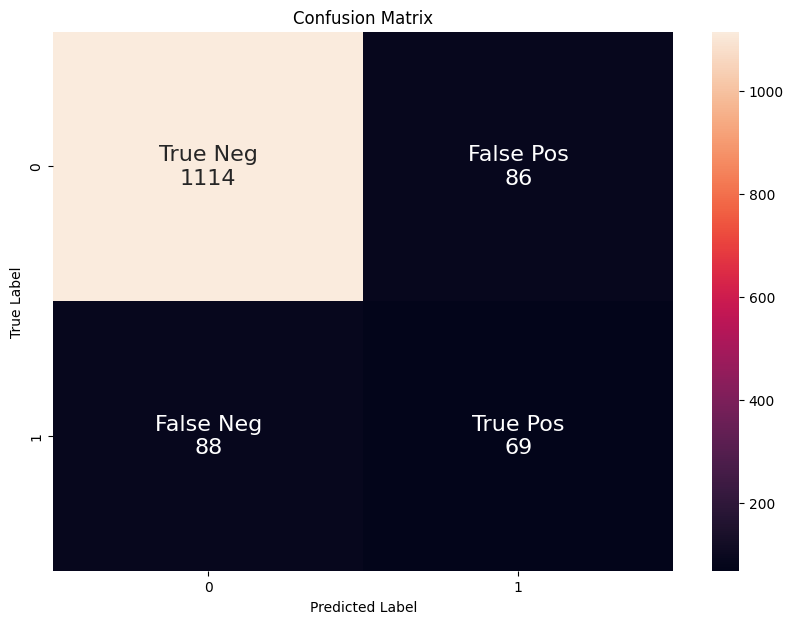

In [49]:
# confusion matrix of KNN model
from sklearn.metrics import confusion_matrix, classification_report
conf_mat = confusion_matrix(Y_test, knn_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [50]:
# classification report for KNN model
print(classification_report(Y_test, knn_Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1200
           1       0.45      0.44      0.44       157

    accuracy                           0.87      1357
   macro avg       0.69      0.68      0.68      1357
weighted avg       0.87      0.87      0.87      1357



In [55]:
svc = SVC(C = 100)
svc.fit(X_train_smote, Y_train)
svm_Y_pred = svc.predict(X_test)
svc_accuracy = svc.score(X_test, Y_test)
svc_accuracy

0.8621960206337509

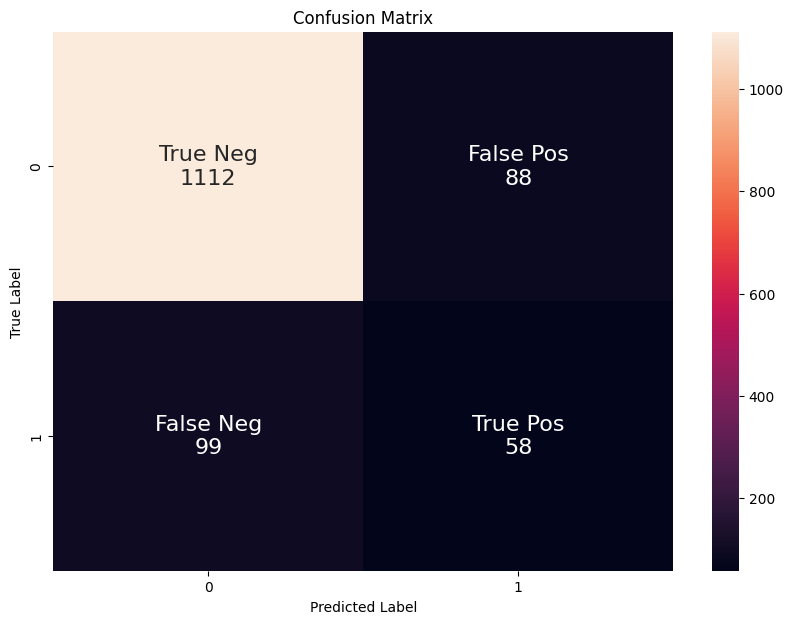

In [56]:
# confusion matrix of SVM model
conf_mat = confusion_matrix(Y_test, svm_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [57]:
# classification report for SVM model
print(classification_report(Y_test, svm_Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1200
           1       0.40      0.37      0.38       157

    accuracy                           0.86      1357
   macro avg       0.66      0.65      0.65      1357
weighted avg       0.86      0.86      0.86      1357



In [65]:
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train_smote, Y_train)
random_forest_Y_pred = random_forest.predict(X_test)
random_forest_accuracy = random_forest.score(X_test, Y_test)
random_forest_accuracy

0.8843036109064112

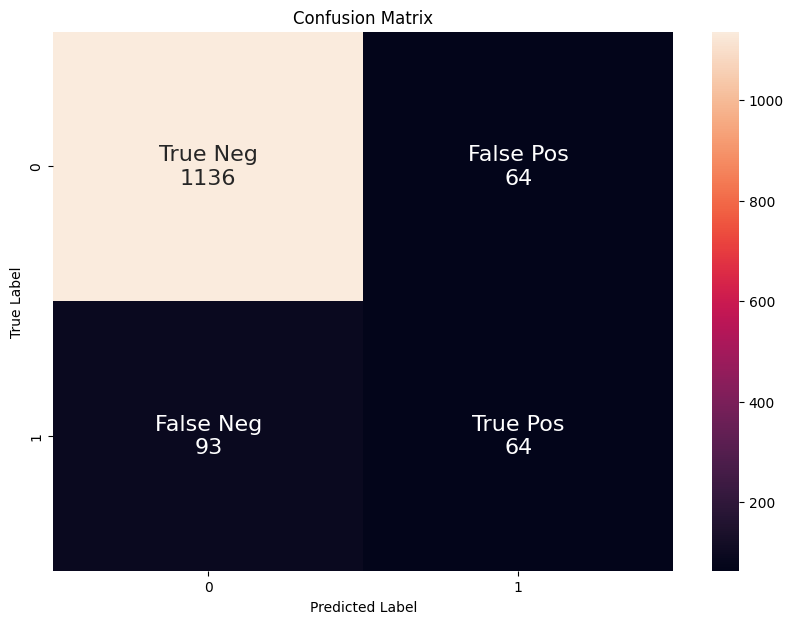

In [66]:
# confusion matrix of random forest model
conf_mat = confusion_matrix(Y_test, random_forest_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [67]:
# classification report for random forest model
print(classification_report(Y_test, random_forest_Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1200
           1       0.50      0.41      0.45       157

    accuracy                           0.88      1357
   macro avg       0.71      0.68      0.69      1357
weighted avg       0.88      0.88      0.88      1357



In [92]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN','Random Forest'],
    'Score': [svc_accuracy, knn_accuracy,random_forest_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,0.884304
1,KNN,0.871776
0,Support Vector Machines,0.862196
